In [16]:
import os
import pandas as pd
import sklearn
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
import glob

csv_files = glob.glob('stock_features/*.csv')
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)


In [18]:
df['Future_Close'] = df['Close'].shift(-1) # Shift future close price up
df['Target'] = (df['Future_Close'] > df['Close']).astype(int)

In [19]:
df.dropna(inplace=True)

In [5]:
features = ['return_1d', 'return_5d', 'return_10d', 'log_return',
            'sma_20', 'sma_50','sma_200',
            'ema_9', 'ema_26', 'ema_50',
            'macd_9', 'macd_signal_9', 'macd_hist_9',
            'roc_10', 'slope_10', 'rolling_std_10','rolling_std_20','rolling_std_50',
            'atr_14', 'RSI_14', 'RSI_30',
            'bollinger_high', 'bollinger_low', 'bb_width',
            'zscore_20', 'volume_change_1d', 'volume_avg_20','volume_spike',
            'obv', 'OBV_100', 'OBV_50',
            'candle_body','upper_wick', 'lower_wick' ,'candle_range','body_ratio','doji_flag',
            'close_lag1', 'close_lag2', 'close_lag3','close_lag4', 'close_lag5',
            'return_lag1', 'return_lag2', 'return_lag3','return_lag4', 'return_lag5',
            'Stoch_Osc_14', 'Stoch_Signal_14',
            'fib_382', 'fib_500', 'fib_618' ]
X = df[features]
y = df['Target']


In [6]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [7]:
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (61168, 52), (61168,)
Testing data shape: (15292, 52), (15292,)


In [8]:
model = XGBClassifier(objective='binary:logistic',
                      eval_metric='logloss',
                      use_label_encoder=False, # Suppress the warning
                      n_estimators=100,      # Number of boosting rounds (trees)
                      learning_rate=0.1,     # Step size shrinkage to prevent overfitting
                      max_depth=3,           # Maximum depth of a tree
                      subsample=0.8,         # Subsample ratio of the training instance
                      colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
                      random_state=42)       # For reproducibility

# Train the model


In [9]:
model.fit(X_train, y_train)
print("XGBoost model trained successfully!")

XGBoost model trained successfully!


/Users/muhammadabdullah/Documents/XGBoost/env1/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:34:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 0] # Probabilities for the positive class (Bullish)
# print (f"Predictions made on the test set: {len(y_pred)} samples")
# print (f"Predicted probabilities for the positive class: {y_pred_proba[:5]}...")  # Display first 5 probabilities
print("\n--- Model Evaluation ---")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Predictions made on the test set: 15292 samples
Predicted probabilities for the positive class: [0.4648013  0.48455387 0.4819466  0.45645356 0.46749622]...

--- Model Evaluation ---
Accuracy: 0.5253

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.12      0.20      7278
           1       0.53      0.89      0.66      8014

    accuracy                           0.53     15292
   macro avg       0.52      0.51      0.43     15292
weighted avg       0.52      0.53      0.44     15292



In [11]:
import numpy as np
# Count predicted classes in the test set
unique, counts = np.unique(y_pred, return_counts=True)
pred_class_counts = dict(zip(unique, counts))
print("Predicted class counts on test set:", pred_class_counts)

Predicted class counts on test set: {0: 1781, 1: 13511}


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you trained with X_train (DataFrame) and model is fitted
importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feature_importance_df.head(45))

             Feature  Importance
4             sma_20    0.044222
37        close_lag1    0.027377
0          return_1d    0.026393
5             sma_50    0.025644
2         return_10d    0.023212
25  volume_change_1d    0.023109
38        close_lag2    0.022994
29           OBV_100    0.022806
3         log_return    0.022393
1          return_5d    0.022298
17    rolling_std_50    0.022142
6            sma_200    0.021821
41        close_lag5    0.021291
10            macd_9    0.021219
11     macd_signal_9    0.021033
32        upper_wick    0.020934
46       return_lag5    0.020909
26     volume_avg_20    0.020880
45       return_lag4    0.020866
28               obv    0.020722
40        close_lag4    0.020528
48   Stoch_Signal_14    0.020197
15    rolling_std_10    0.020195
42       return_lag1    0.020168
35        body_ratio    0.020034
18            atr_14    0.019976
33        lower_wick    0.019968
44       return_lag3    0.019878
43       return_lag2    0.019551
14        

/var/folders/75/49ttglg519gd3g_sjwc146m80000gq/T/ipykernel_13962/2062760251.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


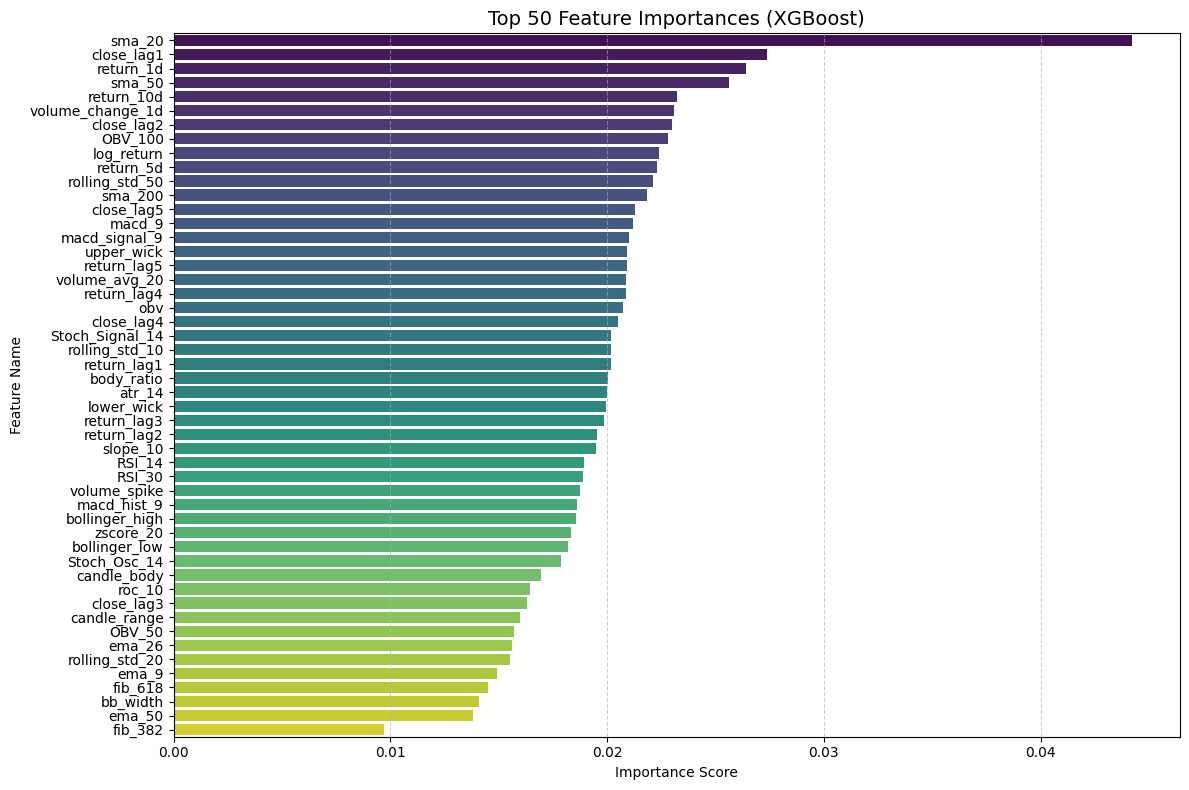

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is trained and X_train is your DataFrame
importance = model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display top 30 features
top_n = 50
top_features = feature_importance_df.head(top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
plt.title(f'Top {top_n} Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


/var/folders/75/49ttglg519gd3g_sjwc146m80000gq/T/ipykernel_13962/3874948292.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(52), y='Feature', x='Importance', palette='viridis')


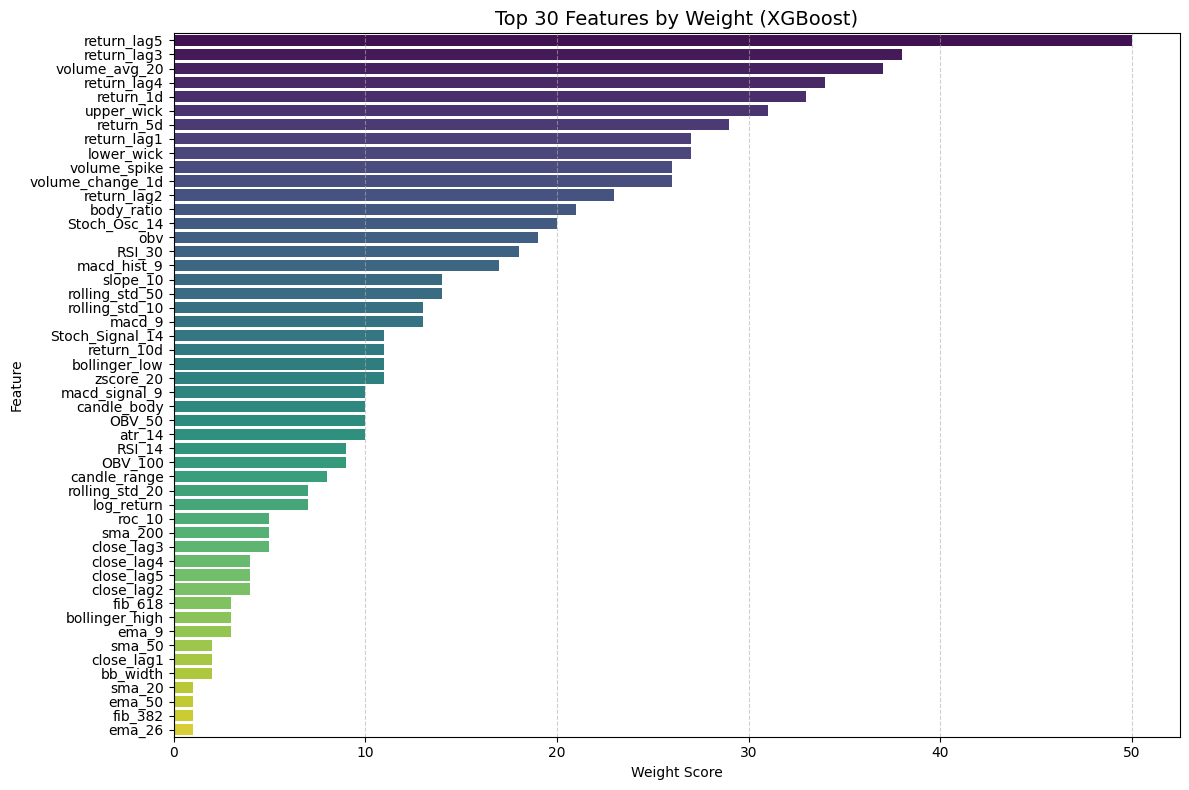

/var/folders/75/49ttglg519gd3g_sjwc146m80000gq/T/ipykernel_13962/3874948292.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(52), y='Feature', x='Importance', palette='viridis')


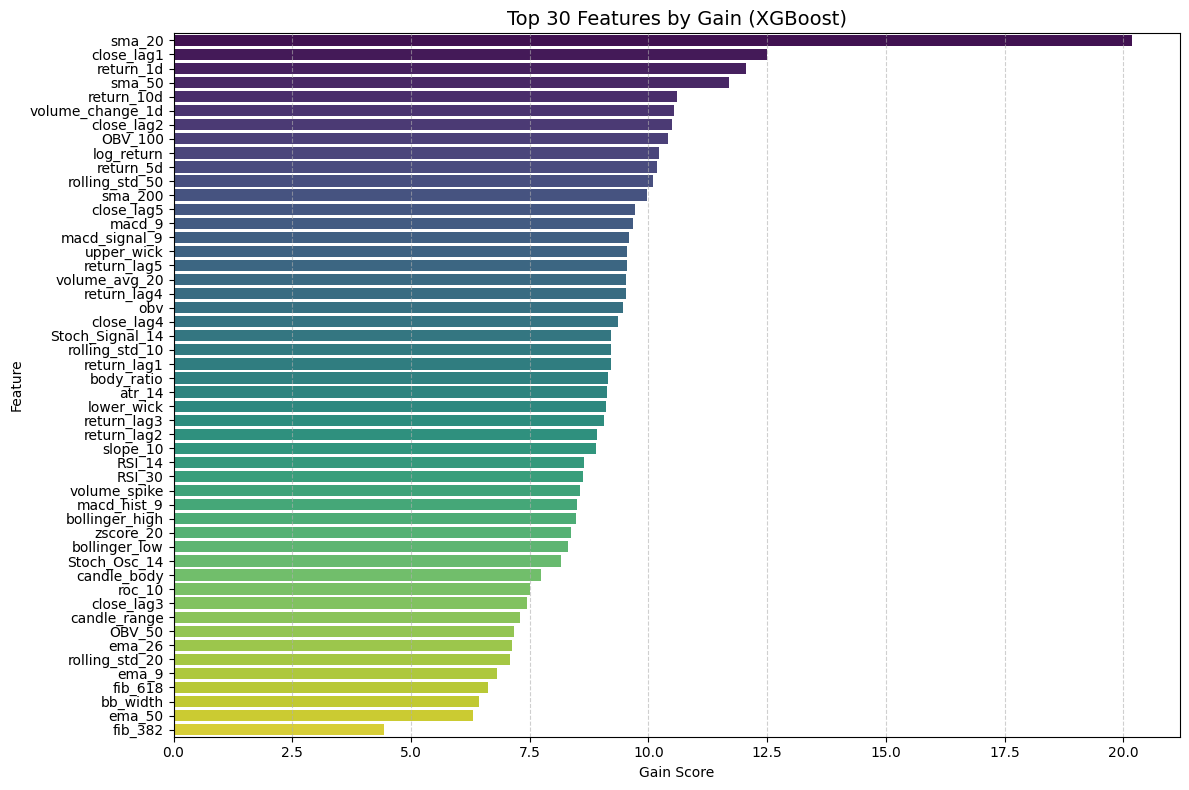

/var/folders/75/49ttglg519gd3g_sjwc146m80000gq/T/ipykernel_13962/3874948292.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(52), y='Feature', x='Importance', palette='viridis')


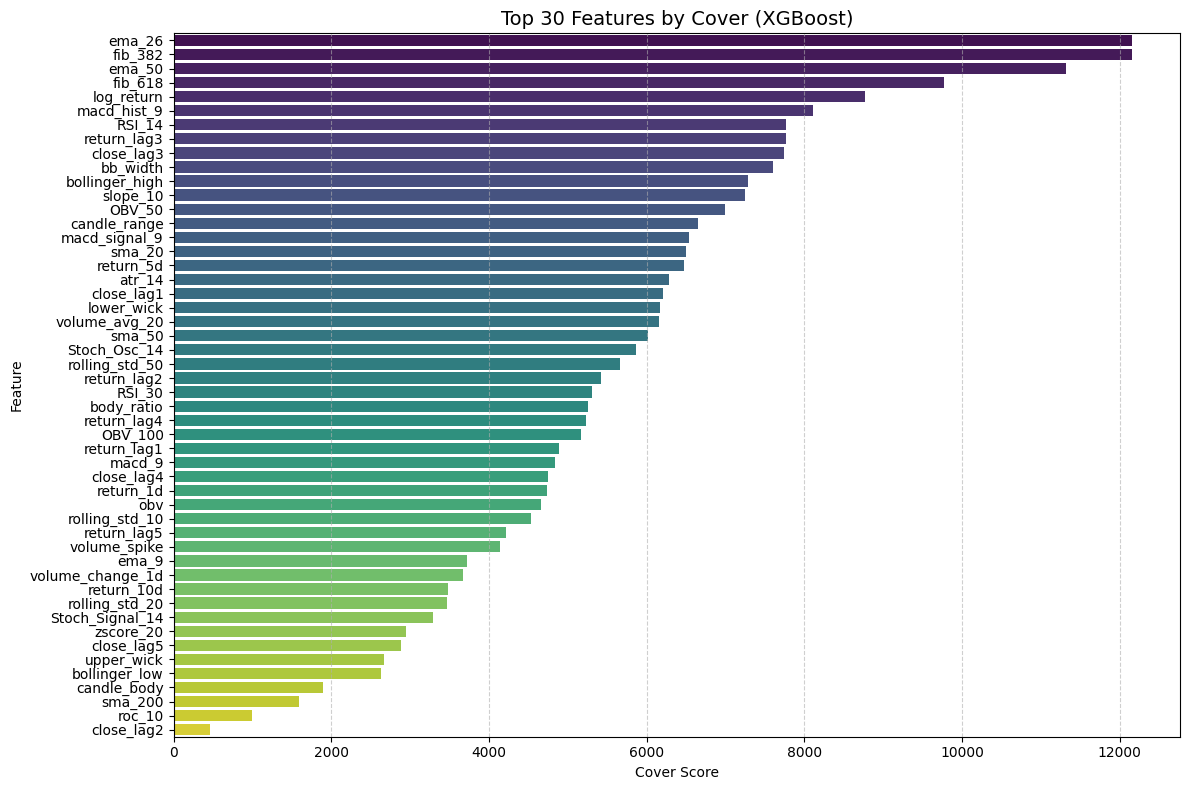

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the booster (low-level model) from the trained XGBoost model
booster = model.get_booster()

# Importance types: 'weight' (split count), 'gain' (average gain), 'cover' (average coverage)
importance_types = ['weight', 'gain', 'cover']
importance_dfs = {}  # Store importance DataFrames for optional comparison

# Loop through each importance type
for imp_type in importance_types:
    # Get feature scores directly (no need to remap feature names)
    score = booster.get_score(importance_type=imp_type)
    
    # Convert to DataFrame
    df = pd.DataFrame(score.items(), columns=['Feature', 'Importance'])
    df = df.sort_values(by='Importance', ascending=False)

    importance_dfs[imp_type] = df  # Optional: save for later

    # Plotting top 30 features
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df.head(52), y='Feature', x='Importance', palette='viridis')
    plt.title(f'Top 30 Features by {imp_type.capitalize()} (XGBoost)', fontsize=14)
    plt.xlabel(f'{imp_type.capitalize()} Score')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [15]:
import pandas as pd
import os
import glob

predictions = []

# Loop through all stock CSVs
for file_path in glob.glob('stock_features/*.csv'):
    stock_name = os.path.basename(file_path).replace('.csv', '')
    
    try:
        df = pd.read_csv(file_path)
        df = df.dropna()

        # Get the same features used in training
        X_stock = df[model.feature_names_in_]
        
        # Select the latest row (for next-day prediction)
        latest_row = X_stock.iloc[-1:]
        
        # Predict
        pred_class = model.predict(latest_row)[0]
        pred_proba = model.predict_proba(latest_row)[0][1]  # Probability of 'Up'

        # Store result
        predictions.append({
            'Stock': stock_name,
            'Prediction': int(pred_class),
            'Probability_Up': round(pred_proba, 4)
        })
    
    except Exception as e:
        print(f"Error processing {stock_name}: {e}")

# Convert to DataFrame and sort by confidence
results_df = pd.DataFrame(predictions).sort_values(by='Probability_Up', ascending=False)

# Show top N stocks likely to go up
print(results_df.head(20))


    Stock  Prediction  Probability_Up
5     BAC           1          0.5337
2    GILD           1          0.5304
6     PEP           1          0.5281
20    DIS           1          0.5241
25  GOOGL           1          0.5237
13     KO           1          0.5233
0    CSCO           1          0.5229
3       V           1          0.5216
31    WMT           1          0.5210
15    RTX           1          0.5195
27     VZ           1          0.5195
23    JPM           1          0.5164
10    CAT           1          0.5147
4       T           1          0.5146
28   AMGN           1          0.5126
8     LOW           1          0.5120
19    WFC           1          0.5115
22   NFLX           1          0.5115
12   AMZN           1          0.5114
30   AAPL           1          0.5098
